In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import handcalcs.render
sns.set_theme(color_codes=True)

In [2]:
data = pd.read_csv("data/test2.csv")

In [3]:
data.count()

x    18
y    18
dtype: int64

In [4]:
data.describe()

,x,y
count,18.000000,18.000000
mean,3.688889,265.777778
std,1.251770,67.319742
min,1.500000,136.000000
25%,2.675000,225.000000
50%,3.600000,241.500000
75%,4.700000,338.000000
max,5.900000,359.000000


In [5]:
X = data['x'].values
Y = data['y'].values

In [6]:
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)

In [7]:
numerator = 0
denominator = 0

for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

print(numerator)
print(denominator)

1341.3555555555554
26.63777777777779


In [8]:
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)#printing the coefficient
print(b1, b0)

50.355385000417094 80.02235755401693


In [9]:
import handcalcs.render

In [10]:
# #plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100

# #calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

d = {'x': x, 'y': y}

df = pd.DataFrame(data=d)

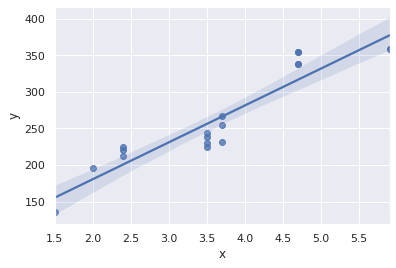

In [11]:
sns.regplot(x="x", y="y", data=data);

In [12]:
from math import sqrt
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [13]:
def pred(x):
    return b0 + b1 * x

In [14]:
data["y_pred"] =   [pred(x) for x in data["x"].values] 

In [15]:
rmse_metric(data["y"].values, data["y_pred"].values)

22.97176490179814

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(data["y"].values, data["y_pred"].values)

0.876710123050926

## SkLearn

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [105]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

In [106]:
X = np.array([data["x"].values])
y = np.array([data["y"].values])

In [107]:
reg = LinearRegression().fit(X.reshape(18, 1), y.reshape(18, 1))

In [108]:
reg.score(X.reshape(18, 1), y.reshape(18, 1))

0.8767101230509259

In [109]:
reg.intercept_

array([80.02235755])

In [110]:
reg.coef_

array([[50.355385]])

In [111]:
b0, b1

(80.02235755401693, 50.355385000417094)

In [112]:
data = pd.read_csv("data/vgsales.csv")

In [117]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [134]:
df = pd.read_csv("../../data/Admission Data.csv")

In [135]:
df.head()

,Name of University,Rigor,Rank,GPA,Test Score,Essay,Recommendation,Interview,Extracurricular,Talent,Personality,First Generation,Religious,State Residency,Race,Volunteer,Work Experience,Level of Interest
0,Princeton University,3,3,3,3,3,3,1,3,3,3,1,0.0,0,1,1,1,0
1,Brown University,3,3,3,3,3,3,1,2,3,3,1,0.0,1,1,1,1,0
2,California Institute of Technology (Caltech),3,2,2,3,3,3,0,2,1,3,1,0.0,0,1,1,1,0
3,Cornell University,3,2,3,3,3,3,1,3,3,3,1,NaN,1,1,1,1,0
4,Dartmouth College,3,3,3,3,3,3,1,3,2,3,0,1.0,0,1,1,1,1


In [148]:
X, y = np.array([df["Recommendation"].values]), np.array([df["Essay"].values])

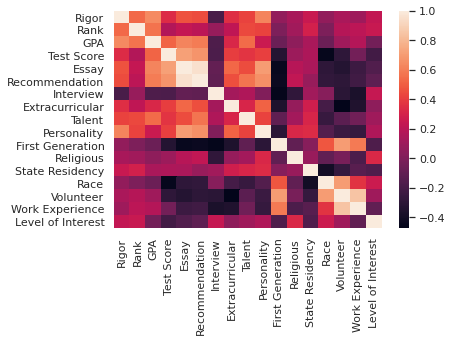

In [146]:
sns.set_theme()
ax = sns.heatmap(df.corr())

In [152]:
reg = LinearRegression().fit(X.reshape(X.shape[1], 1), y.reshape(y.shape[1], 1))

In [154]:
reg.score(X.reshape(X.shape[1], 1), y.reshape(y.shape[1], 1))

0.9199004975124379

In [155]:
reg.intercept_

array([0.13432836])

In [156]:
reg.coef_

array([[0.96268657]])

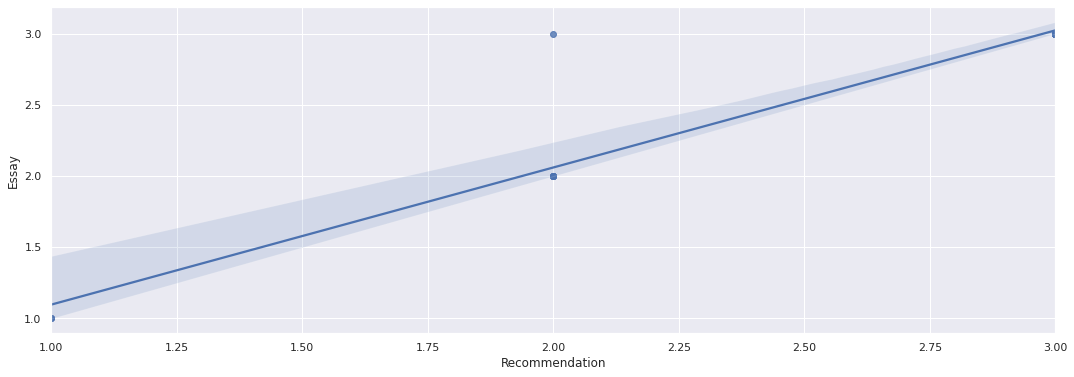

In [160]:
ax = sns.regplot(x="Recommendation", y="Essay", data=df)
ax.figure.set_size_inches(18,6)

In [161]:
df[["Recommendation", "Essay"]].head()

,Recommendation,Essay
0,3,3
1,3,3
2,3,3
3,3,3
4,3,3


In [164]:
df_idh = pd.read_csv("../../data/HDI.csv")

In [171]:
# df_idh[df_idh["Country"].isin(["Brazil"])].T

In [ ]:
plt.xticks(rotation=90)
sns.set_palette("Accent")
sns.set_style("darkgrid")
ax = sns.lineplot(x='year_month', y='Vítimas', data=df_a[df_a["Município"].isin(l)], hue="Município")
ax.figure.set_size_inches(18,6)
# ax.set_title("Vendas Alucard de 2017 e 2018", loc='left', fontsize=18)
# ax.set_xlabel("Tempo", fontsize=14)
# ax.set_ylabel("Vendas (R$)", fontsize=14)
ax = ax
# df_home_win.head()